# Linear Regression - Medical Insurance EDA and Model Training

#### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset

In [2]:
train_data = pd.read_csv('/workspaces/gustavolima-linearregression-eda/data/raw/main_medical_insurance_cost.csv')
test_data = pd.read_csv('/workspaces/gustavolima-linearregression-eda/data/raw/main_medical_insurance_cost.csv')

total_data = pd.concat([train_data, test_data])
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Dataset Analysis

In [3]:
# Dataset Shape Analysis

total_data.shape

(2676, 7)

In [4]:
# Dataset Info 

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2676 non-null   int64  
 1   sex       2676 non-null   object 
 2   bmi       2676 non-null   float64
 3   children  2676 non-null   int64  
 4   smoker    2676 non-null   object 
 5   region    2676 non-null   object 
 6   charges   2676 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 167.2+ KB


In [5]:
# Identify and Trim Duplicates

if df.duplicated().sum() > 0 :
    df.drop_duplicates()

There is no Irrelevant data to trim from this dataset. All Data is needed.

### Univariate Data Analysis

##### Categorical Univariate Data Analysis

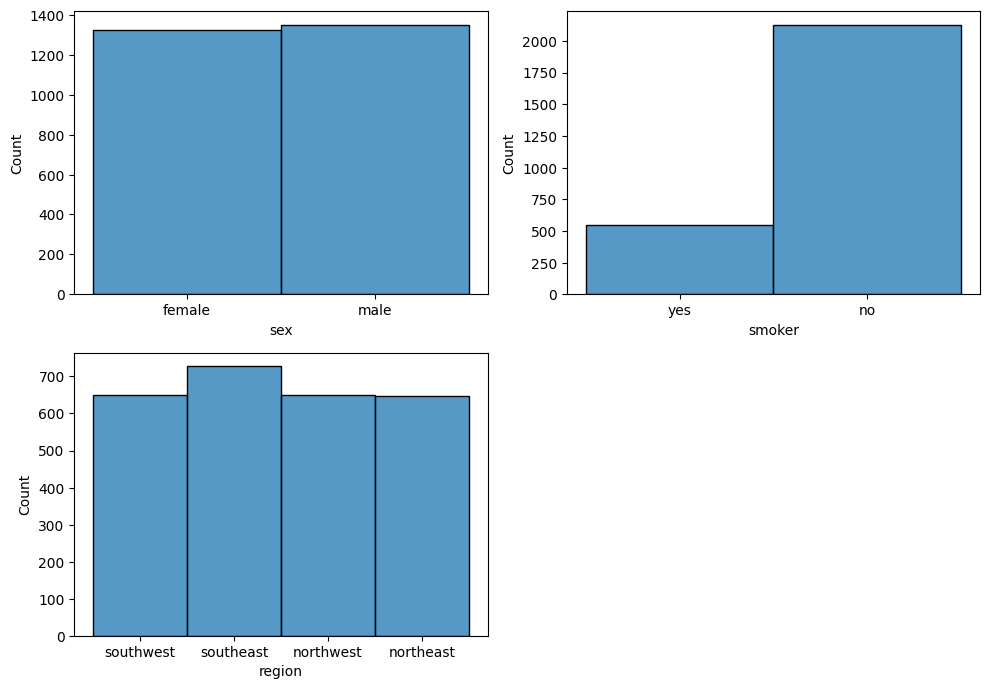

In [6]:
# Categorical Univariate Data Analysis

# Draw Canvas
fig, axis = plt.subplots(2, 2, figsize=(10,7))

# Plot Histogram Data
sns.histplot(ax=axis[0,0], data= total_data, x='sex')
sns.histplot(ax=axis[0,1], data= total_data, x='smoker')
sns.histplot(ax=axis[1,0], data= total_data, x='region')
fig.delaxes(axis[1,1])

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

We see that our categorial data:

- is quite homogeneous all around
- our population we have very little number of smokers compared to smokers. 

##### Numerical Univariate Data Analysis

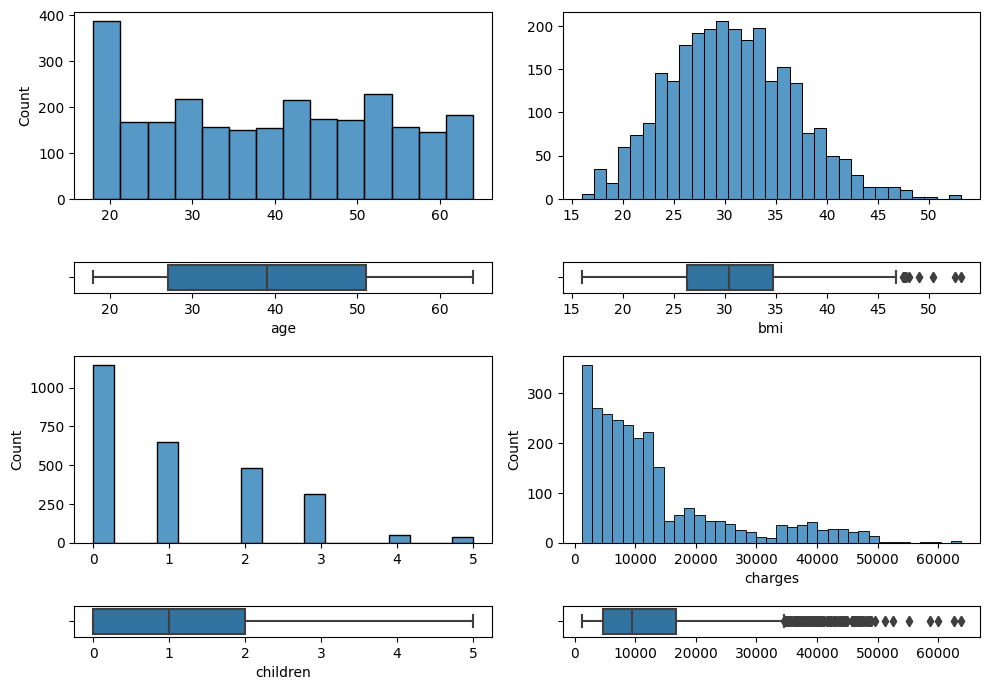

In [11]:
# Numerical Data Univariate Data Analysis

# Draw a Canvas
fig, axis = plt.subplots(4,2, figsize=(10,7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Plot Histogram and Heatmaps for our Data
sns.histplot(ax=axis[0,0], data= total_data, x='age').set(xlabel = None)
sns.boxplot(ax=axis[1,0], data= total_data, x='age')
sns.histplot(ax=axis[0,1], data= total_data, x='bmi').set(xlabel = None, ylabel = None)
sns.boxplot(ax=axis[1,1], data= total_data, x='bmi')
sns.histplot(ax=axis[2,0], data= total_data, x='children').set(xlabel = None)
sns.boxplot(ax=axis[3,0], data= total_data, x='children')
sns.histplot(ax=axis[2,1], data= total_data, x='charges')
sns.boxplot(ax=axis[3,1], data= total_data, x='charges').set(xlabel = None, ylabel = None)

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

We can observe that:

- Data Distribution is the a Normal Distribution.
- There are few Outliers in BMI and Charges, which is expected (very fat people for example) 
- There are quite a few outliers in Charges (due to smoking, already present comorbities/conditions)

### Multivariate Data Analysis

##### Numerical - Numerical Data Analysis

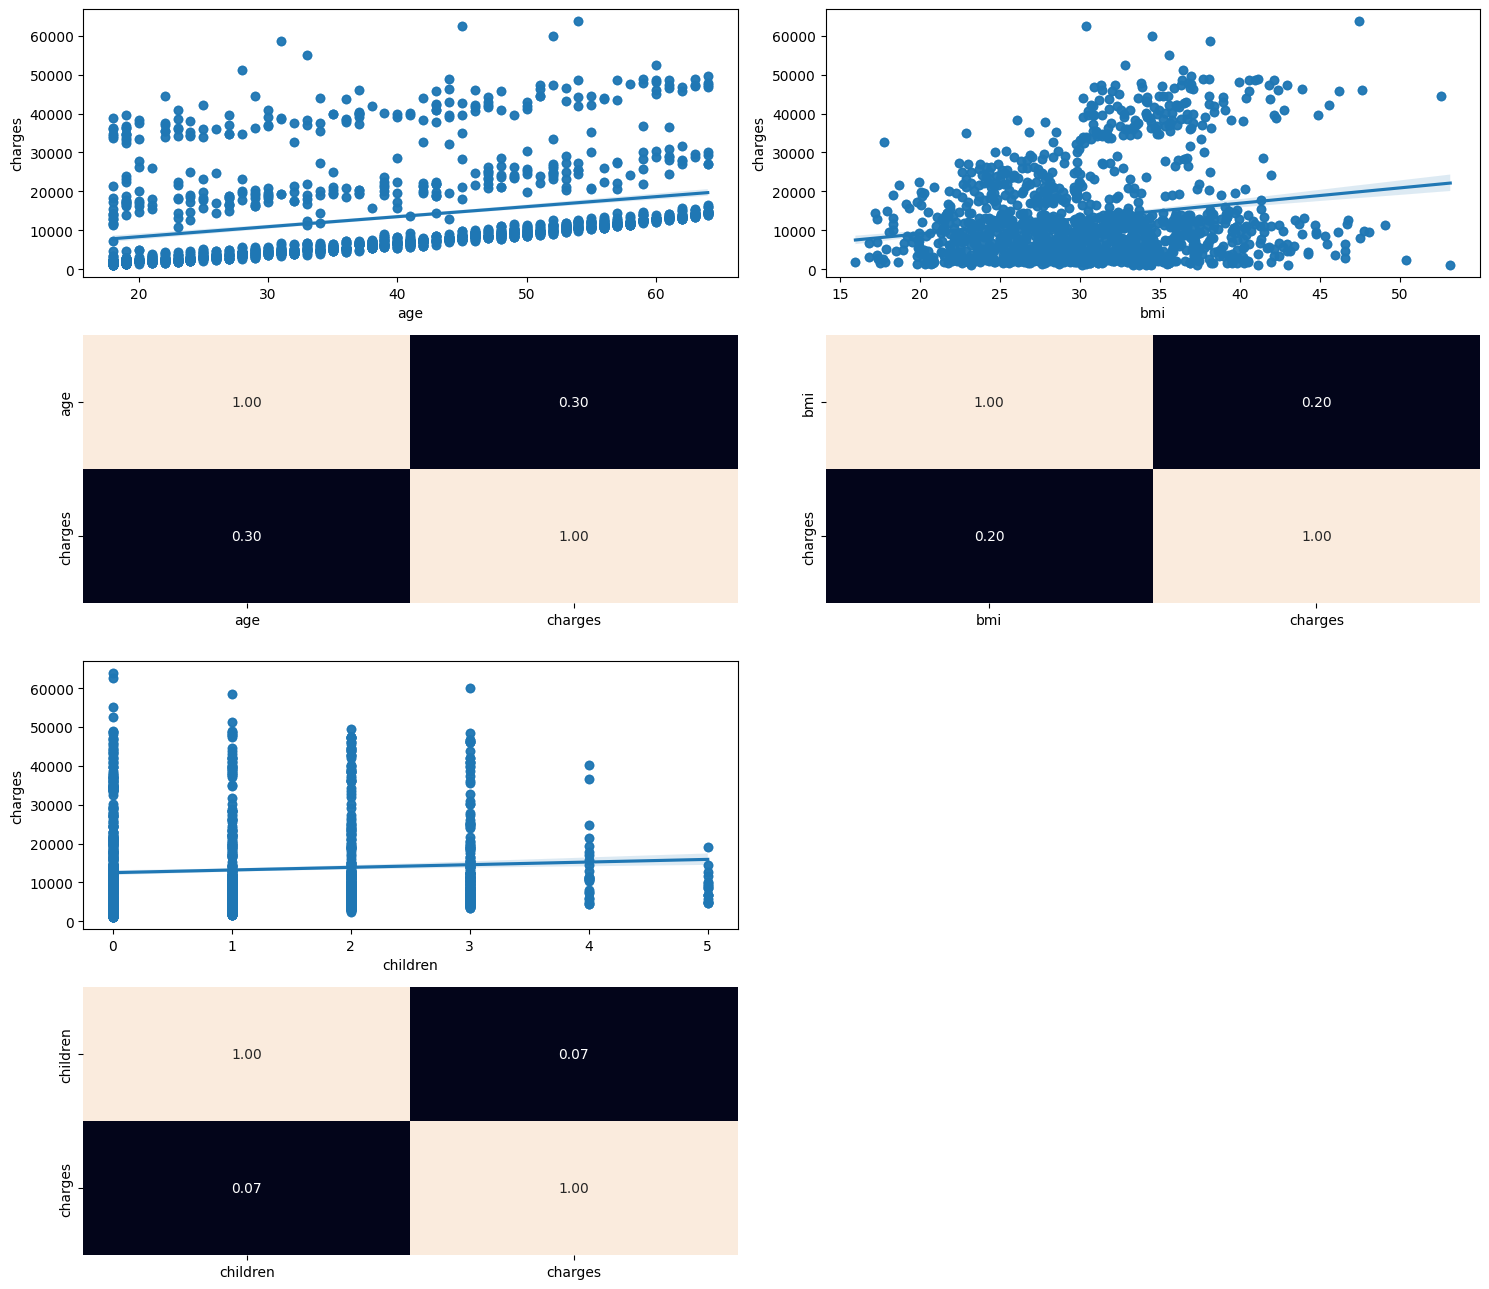

In [16]:
# Numerical - Numerical Data Analysis (Target is 'charges')

# Draw a canvas
fig, axis = plt.subplots(4, 2, figsize=(15, 13))

# Plot the Data (RegPlot and Heatmaps)
sns.regplot(ax=axis[0,0], data= total_data, x='age', y='charges')
sns.heatmap(total_data[['age', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[1,0], cbar=False)
sns.regplot(ax=axis[0,1], data= total_data, x='bmi', y='charges')
sns.heatmap(total_data[['bmi', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[1,1], cbar=False).set(ylabel=None)
sns.regplot(ax=axis[2,0], data= total_data, x='children', y='charges')
sns.heatmap(total_data[['children', 'charges']].corr(), annot=True, fmt='.2f', ax=axis[3,0], cbar=False)
fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

#### Categorical - Categorical Multivariate Analysis

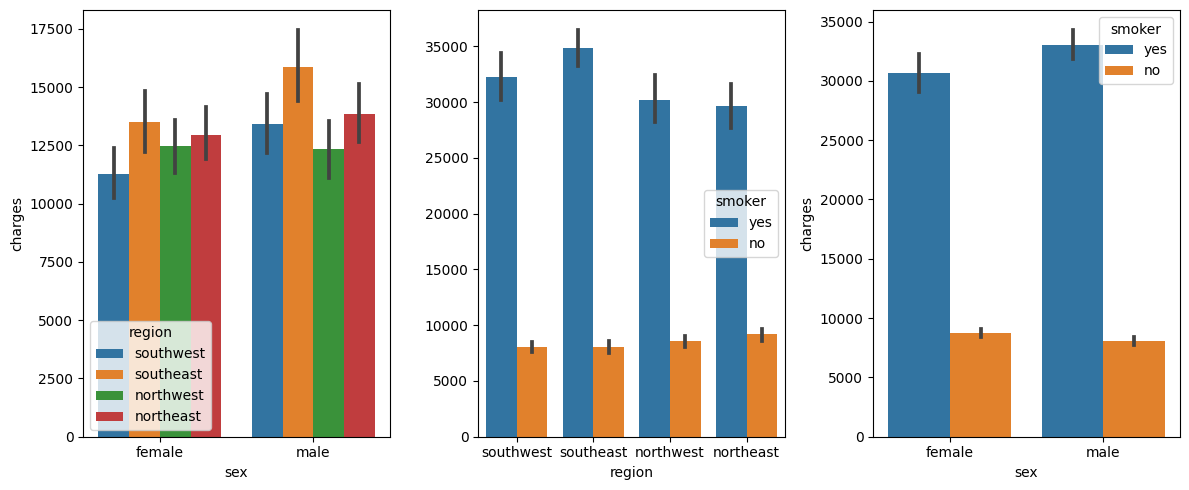

In [20]:
# Categorical - Categorical Multivariate Analysis 

# Draw canvas
fig, axis = plt.subplots(figsize=(12,5), ncols=3)

# Plot the Data 
sns.barplot(ax=axis[0], data= total_data, x='sex', y='charges', hue='region')
sns.barplot(ax=axis[1], data= total_data, x='region',y='charges', hue='smoker').set(ylabel=None)
sns.barplot(ax=axis[2], data= total_data, x='sex', y='charges', hue='smoker')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

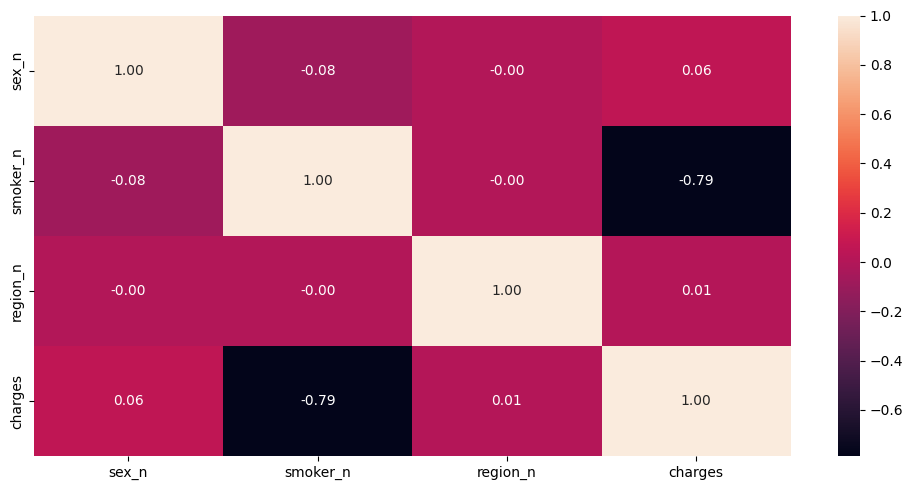

In [23]:
# Correlation Analysis Categorical - Categorical

# Factorize Data
total_data['sex_n'] = pd.factorize(total_data['sex'])[0]
total_data['smoker_n'] = pd.factorize(total_data['smoker'])[0]
total_data['region_n'] = pd.factorize(total_data['region'])[0]

# Draw Canvas
fig, axis = plt.subplots(figsize=(10,5))

# Plot Heatmap
sns.heatmap(total_data[['sex_n', 'smoker_n', 'region_n', 'charges']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot 
plt.show()

We can see that smokers and charges have a very strong correlation

##### Categorical - Numerical Data Analysis

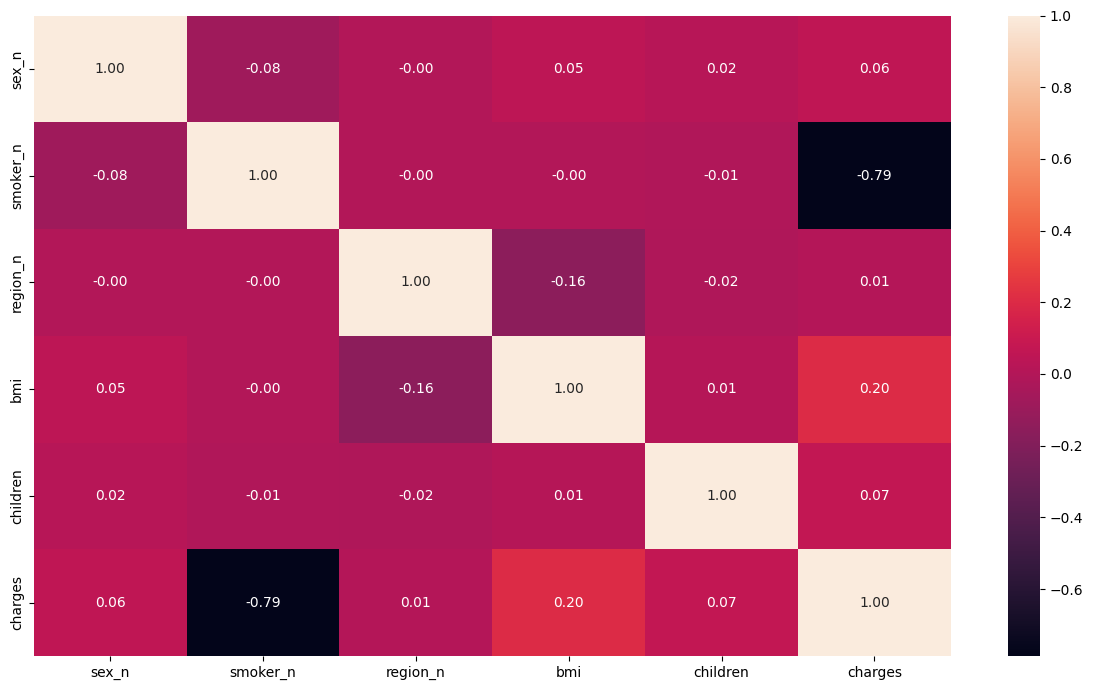

In [24]:
# Draw Canvas
fig, axis = plt.subplots(figsize=(12,7))

# Plot Heatmap
sns.heatmap(total_data[['sex_n', 'smoker_n', 'region_n', 'bmi', 'children', 'charges']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot 
plt.show()

With the Categorical - Numerical Heatmap:

- Smokers and BMI have a correlation with the Insurance Charges (fatness / smoking)

### Feature Engineering

In [25]:
# Data Set Feature Info

total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000,2676.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.047334,6.097047,1.205267,12107.747472,0.500066,0.403619,1.104678
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4738.268200,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


In [26]:
# Null Analysis

total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

There is no Null Data

#### Outliers Analysis

As we seen before with the Boxplots above:

- BMI Outliers are needed because they represent obese people and other health issues
- Charges Outliers will also be kept as they represent special cases where comorbities and conditions are present

So, we are not removing those outliers as they are essencial for our model

#### Data Normalization

In [63]:
# Data Normalization with Scikit MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

num_variables = ['age', 'bmi','children', 'sex_n', 'smoker_n', 'region_n', 'charges']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


#### Feature Selection

In [100]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_scal.drop('charges', axis = 1)
y = total_data_scal['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()



,age,bmi,children,smoker_n
0,0.456522,0.792844,0.4,1.0
1,0.065217,0.038741,0.2,1.0
2,0.413043,0.035782,0.4,1.0
3,0.804348,0.442158,0.2,1.0
4,0.217391,0.215765,0.6,0.0


In [102]:
# Save Data
X_train_sel['charges'] = list(y_train)
X_test_sel['charges'] = list(y_test)
X_train_sel.to_csv('/workspaces/gustavolima-linearregression-eda/data/processed/clean_train-insuranceeda.csv', index=False)
X_test_sel.to_csv('/workspaces/gustavolima-linearregression-eda/data/processed/clean_test-insuranceeda.csv', index=False)

#### Train the Model

In [103]:
train_data = pd.read_csv('/workspaces/gustavolima-linearregression-eda/data/processed/clean_train-insuranceeda.csv')
test_data = pd.read_csv('/workspaces/gustavolima-linearregression-eda/data/processed/clean_test-insuranceeda.csv')

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.456522,0.792844,0.4,1.0,0.083552
1,0.065217,0.038741,0.2,1.0,0.023359
2,0.413043,0.035782,0.4,1.0,0.091879
3,0.804348,0.442158,0.2,1.0,0.171708
4,0.217391,0.215765,0.6,0.0,0.264033


In [104]:
X_train = train_data.drop(['charges'], axis = 1)
y_train = train_data['charges']
X_test = test_data.drop(['charges'], axis = 1)
y_test = test_data['charges']

In [114]:
# Train the Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [115]:
# Parameter Fitting
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 0.32355825066204885
Coefficients (b1, b2): [ 0.19026853  0.19548577  0.03865856 -0.38000051]


In [116]:
# Model Prediction
y_pred = model.predict(X_test)

In [118]:
# Test The Model Accuracy
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.008674064816189778
Coefficient of determination: 0.7432768530692988


#### HyperParameters Optimization

In [98]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# We define the parameters by hand that we want to adjust
hyperparams = {
    'fit_intercept': [True, False],  
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = 'neg_mean_squared_error', cv = 5)
grid

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [119]:
grid.fit(X_train, y_train)

# Step 8: Get the best hyperparameters and model
best_params = grid.best_params_
best_model = grid.best_estimator_

# Step 9: Evaluate the model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test MSE: {mse}")

Best Hyperparameters: {'fit_intercept': True}
Test MSE: 0.008674064816189778


There was no optimization at all. 

##### Trying with Ridge


In [122]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 3: Define Hyperparameter Grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Step 4: Grid Search with Cross-Validation
model = Ridge()
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Step 5: Select Best Hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Step 6: Evaluate on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse}')

Best alpha: 0.1
Root Mean Squared Error (RMSE) on Test Set: 0.09313212279967034


Even worse than before with Lr